In [16]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import t, norm, chi2,gamma
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import chi2_contingency ,pointbiserialr
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [17]:
df=pd.read_csv('voitures1.csv') 
def corr_matrix(data):
    corr_matrix = np.zeros((len(data.columns), len(data.columns)))
    for i, col1 in enumerate(data.columns):
        for j, col2 in enumerate(data.columns):
            cont_table = pd.crosstab(data[col1], data[col2])
            chi2, p, dof, expected = chi2_contingency(cont_table)
            n = np.sum(cont_table.values)
            v = np.sqrt(chi2 / (n * (min(cont_table.shape) - 1)))
            corr_matrix[i, j] = v
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)
    sns.heatmap(corr_matrix, annot=True, xticklabels=data.columns, yticklabels=data.columns)
    plt.show()
# plot heatmap

df.head()

,Modèle,État,Année-Modèle,Marque,Origine,Kilométrage,Première main,Nombre de portes,carburant,Ville,boite,puissance,price
0,Tiguan,NaN,2012.0,Volkswagen,Dédouanée,194999.5,NaN,NaN,Diesel,Fquih Ben Saleh,NaN,8 CV,210000.0
1,190,Très bon,2005.0,Mercedes-Benz,Dédouanée,274999.5,Non,5.0,NaN,Dakhla,Manuelle,8 CV,55000.0
2,Lodgy,Très bon,2012.0,Dacia,WW au Maroc,2499.5,Oui,5.0,Diesel,Ouled Teïma,NaN,6 CV,87000.0
3,2,Excellent,2008.0,Mazda,WW au Maroc,124999.5,Oui,5.0,NaN,El Jadida,Manuelle,8 CV,54000.0
4,Kadjar,Excellent,2016.0,Renault,WW au Maroc,82499.5,Oui,5.0,NaN,Casablanca,Manuelle,6 CV,159000.0


In [18]:
df1=df.copy()


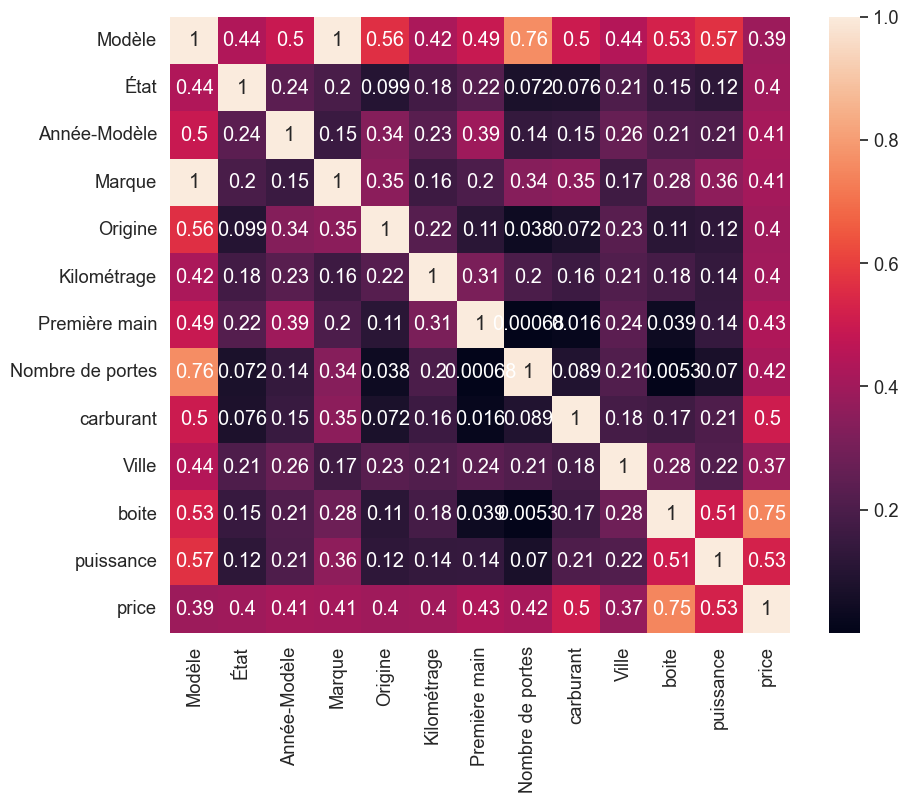

In [19]:
data=df1.copy()
corr_matrix(data)

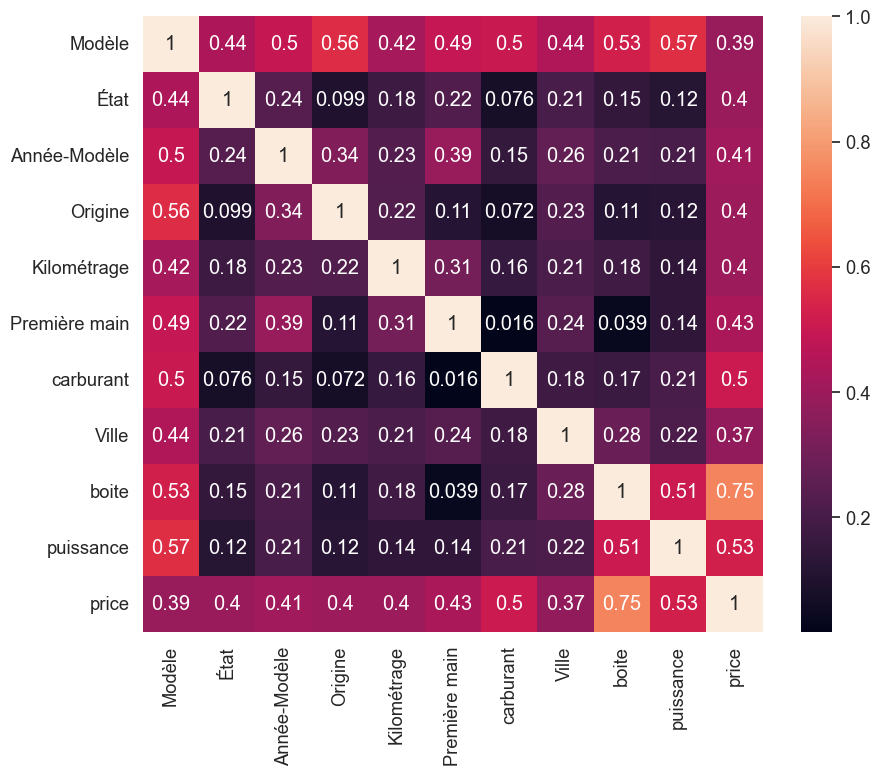

In [20]:
data = data.drop(['Marque','Nombre de portes'], axis=1)
corr_matrix(data)

,Modèle,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,Ville,boite,puissance,price
0,Tiguan,NaN,2012.0,Dédouanée,194999.5,NaN,Diesel,Fquih Ben Saleh,NaN,8 CV,210000.0
1,190,Très bon,2005.0,Dédouanée,274999.5,Non,NaN,Dakhla,Manuelle,8 CV,55000.0
2,Lodgy,Très bon,2012.0,WW au Maroc,2499.5,Oui,Diesel,Ouled Teïma,NaN,6 CV,87000.0
3,2,Excellent,2008.0,WW au Maroc,124999.5,Oui,NaN,El Jadida,Manuelle,8 CV,54000.0
4,Kadjar,Excellent,2016.0,WW au Maroc,82499.5,Oui,NaN,Casablanca,Manuelle,6 CV,159000.0


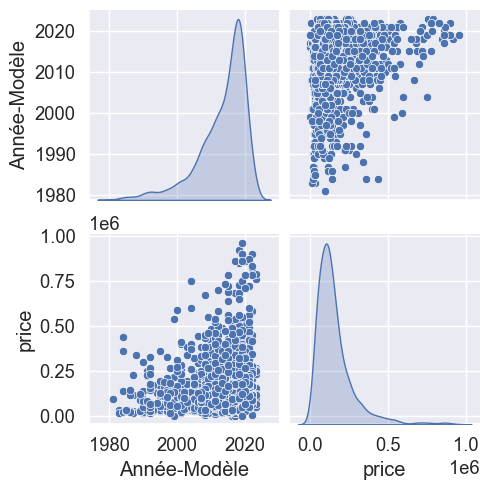

In [21]:
def visualize(data):
    sns.pairplot(data, diag_kind="kde", height=2.5)
visualize(data)
data.head()

In [22]:
data["puissance"].value_counts()

6 CV             650
8 CV             442
9 CV             126
7 CV             124
12 CV             88
5 CV              54
10 CV             48
11 CV             39
14 CV              4
18 CV              3
4 CV               3
17 CV              2
13 CV              2
28 CV              2
35 CV              1
21 CV              1
19 CV              1
Plus de 41 CV      1
26 CV              1
24 CV              1
Name: puissance, dtype: int64

In [25]:
def preprocessing_one(data):
    data['Kilométrage'] = data['Kilométrage'].replace('Plus de 500 000', 500000.0)
    data['puissance'] = pd.to_numeric(data['puissance'].replace({'Plus de 41 CV': '41', ' CV': ''}, regex=True), errors='coerce').fillna(8).astype(int)# convert the column to float
    data['Kilométrage'] = data['Kilométrage'].astype(float)
    data['Année-Modèle'] = data['Année-Modèle'].astype(float)
    data['price'] = data['price'].astype(float)
    mean_target = data.groupby('Modèle')['price'].median()
    data['Modèle_mean_target'] = data['Modèle'].map(mean_target)
    mean_target = data.groupby('Ville')['price'].mean()
    data['Ville_mean_target'] = data['Ville'].map(mean_target)

    data['Année-Modèle'] = data['Année-Modèle'].fillna(data['Année-Modèle'].mean())  # fills missing values with the mean of the column
    data['Kilométrage'] = data['Kilométrage'].fillna(data['Kilométrage'].median())
    ignore_cols = ['Modèle', 'Ville']
    
# Define the scaler
    scaler = StandardScaler()

# Fit and transform the features
    data[['Année-Modèle','Kilométrage','Modèle_mean_target','Ville_mean_target']]=scaler.fit_transform(data[['Année-Modèle','Kilométrage','Modèle_mean_target','Ville_mean_target']])
    
    #le = LabelEncoder()
    #for i in [ 'Première main', 'boite','État',  'Origine','carburant']:
     #   data[i] = le.fit_transform(data[i])
# perform label encoding on 'team' column
    dummy_cols = ['Première main', 'boite', 'État', 'Origine', 'carburant']
    normalized_data = pd.get_dummies(data, columns=dummy_cols)

# Split the dataset into features and target variable
    
    normalized_data = normalized_data.drop(columns=ignore_cols)


# Concatenate the normalized features and the target variable
    #normalized_data = data.drop( ignore_cols, axis=1)
    return normalized_data,data

normalized_data=preprocessing_one(data)[0]
all_data=preprocessing_one(data)[1]
normalized_data.head()
#visualize(normalized_data)

,Année-Modèle,Kilométrage,puissance,price,Modèle_mean_target,Ville_mean_target,Première main_Non,Première main_Oui,boite_Automatique,boite_Manuelle,...,État_Excellent,État_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_Hybride
0,-0.174170,0.776607,8,210000.0,0.444020,0.085127,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,-1.164002,1.755394,8,55000.0,-1.171229,0.520697,1,0,0,1,...,0,1,1,0,0,0,0,0,0,0
2,-0.174170,-1.578601,6,87000.0,1.775269,-2.658758,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
3,-0.739789,-0.079833,8,54000.0,-1.366479,-1.059850,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0
4,0.391448,-0.599814,6,159000.0,0.426270,0.776946,0,1,0,1,...,1,0,0,0,0,1,0,0,0,0


In [26]:
def remove_outliers(data, col,q_min,q_max):
    q01 = data[col].quantile(q_min)
    q99 = data[col].quantile(q_max)
    data = data[(data[col] > q01) & (data[col] < q99)]
    return data


# Exemple
normalized_data=remove_outliers(normalized_data, 'price',0.01,0.96)
#clio1 = normalized_data.loc[normalized_data.Modèle=='Clio']
#sns.distplot(clio1.price).set_title('Clio Price Distribution')


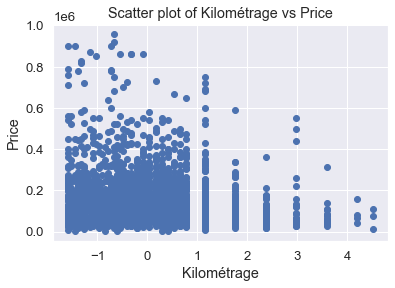

In [126]:
plt.scatter(data["Kilométrage"], data["price"])
plt.xlabel("Kilométrage")
plt.ylabel("Price")
plt.title("Scatter plot of Kilométrage vs Price")
plt.show()

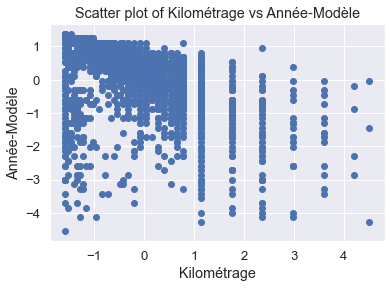

In [127]:
plt.scatter(data["Kilométrage"], data["Année-Modèle"])
plt.xlabel("Kilométrage")
plt.ylabel("Année-Modèle")
plt.title("Scatter plot of Kilométrage vs Année-Modèle")
plt.show()

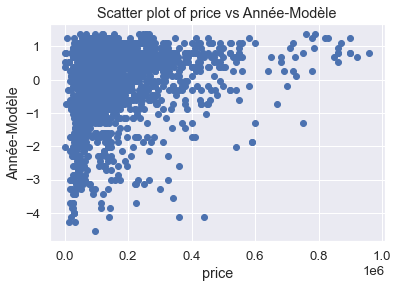

In [128]:
plt.scatter(data["price"], data["Année-Modèle"])
plt.xlabel("price")
plt.ylabel("Année-Modèle")
plt.title("Scatter plot of price vs Année-Modèle")
plt.show()

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
normalized_data.fillna(normalized_data.mean(), inplace=True)

# Load the data into a pandas dataframe
X = normalized_data.drop('price', axis=1)  # features
y = normalized_data['price']       
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

# Fit the model using the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the labels for the testing data
y_pred = model.predict(X_test)

# Compute the R-squared score for the model
score = model.score(X_test, y_test)
score1 = model.score(X_train, y_train)

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R-squared score:', score)
print('R-squared score:', score1)


Coefficients: [  8539.00748203  -5183.00909259   6759.12656314  24734.0444812
  11525.97207059  -3109.9463566    -666.57309686  46826.098489
 -34538.85274499  -5073.45329178   1843.50185002  11043.68878286
 -35401.68513006  -4539.56752464  -2354.78741553  -1533.63748182
  -7288.01476875   6996.51158208  -4648.42785229   1596.79661386
 -48390.5464775  -44809.42698486  58527.70885457]
Intercept: 102579.37398860558
R-squared score: 0.4145801660280757
R-squared score: 0.4211304953307472


In [29]:
import statsmodels.api as sm
X=sm.add_constant(X)

model1 = sm.OLS(y, X).fit()

# Print the summary of the model
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     74.65
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          1.29e-259
Time:                        09:39:52   Log-Likelihood:                -29682.
No. Observations:                2384   AIC:                         5.941e+04
Df Residuals:                    2360   BIC:                         5.955e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.035e+05   7246.629     14.276      0.000    8.92e+04    1.18e+05
Année-Modèle                  8561.5324   1688.401      5.071      0.000    5250.629    1.19e+04
Kilométrage                  -5854.8892   1443.423     -4.056      0.000   -8685.398   -3024.381
puissance                     6460.6770    791.607      8.161      0.000    4908.359    8012.995
Modèle_mean_target              2.4e+04   1751.476     13.703      0.000    2.06e+04    2.74e+04
Ville_mean_target              1.14e+04   1332.225      8.556      0.000    8785.676     1.4e+04
Première main_Non               62.1640   3683.438      0.017      0.987   -7160.947    7285.275
Première main_Oui             1941.5790   3884.601      0.500      0.617   -5676.006    9559.164
boite_Automatique             4.808e+04   3721.418     12.920      0.000    4.08e+04    5.54e+04
boite_Manuelle               -3.368e+04   3187.965    -10.566      0.000   -3.99e+04   -2.74e+04
État_6                       -3673.1176   6804.185     -0.540      0.589    -1.7e+04    9669.683
État_Bon                     -1823.5875   6226.069     -0.293      0.770    -1.4e+04    1.04e+04
État_Correct                  3941.5010   1.48e+04      0.267      0.789    -2.5e+04    3.29e+04
État_Endommagé               -3.331e+04   6.26e+04     -0.532      0.595   -1.56e+05    8.95e+04
État_Excellent               -5586.6897   5224.162     -1.069      0.285   -1.58e+04    4657.733
État_Très bon                 -847.1390   5032.082     -0.168      0.866   -1.07e+04    9020.621
Origine_Dédouanée             1131.7643   5833.318      0.194      0.846   -1.03e+04    1.26e+04
Origine_Importée neuve       -1.104e+04   7040.167     -1.568      0.117   -2.48e+04    2764.278
Origine_Pas encore dédouanée  3793.2125   2.13e+04      0.178      0.859    -3.8e+04    4.56e+04
Origine_WW au Maroc          -7374.9056   4803.604     -1.535      0.125   -1.68e+04    2044.815
carburant_Diesel              2411.5390   3024.259      0.797      0.425   -3518.941    8342.019
carburant_Electrique         -4.853e+04   3.63e+04     -1.337      0.181    -1.2e+05    2.27e+04
carburant_Essence            -4.344e+04   4982.266     -8.719      0.000   -5.32e+04   -3.37e+04
carburant_Hybride             5.984e+04   2.37e+04      2.525      0.012    1.34e+04    1.06e+05
==============================================================================
Omnibus:                      356.277   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              730.659
Skew:                           0.896   Prob(JB):                    2.18e-159
Kurtosis:                       5.036   Cond. No.                         392.
=====================================================================

In [30]:
conf_int = model1.conf_int(alpha=0.1)

# print the confidence intervals
conf_int

,0,1
const,91527.343027,115375.992585
Année-Modèle,5783.269064,11339.795685
Kilométrage,-8230.040982,-3479.737404
puissance,5158.087698,7763.266259
Modèle_mean_target,21119.108923,26883.214310
Ville_mean_target,9205.953372,13590.306203
Première main_Non,-5998.931831,6123.259780
Première main_Oui,-4450.530561,8333.688641
boite_Automatique,41958.525240,54205.708696
boite_Manuelle,-38928.505949,-28436.916928


C:\Users\hp\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 3286043763.9308786
R2 score: 0.44684701020033346


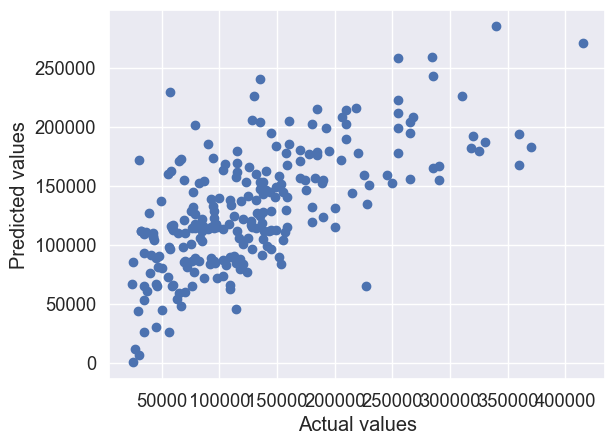

C:\Users\hp\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hp\anaconda1\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 3285206063.73609
R2 score: 0.44698802365012047


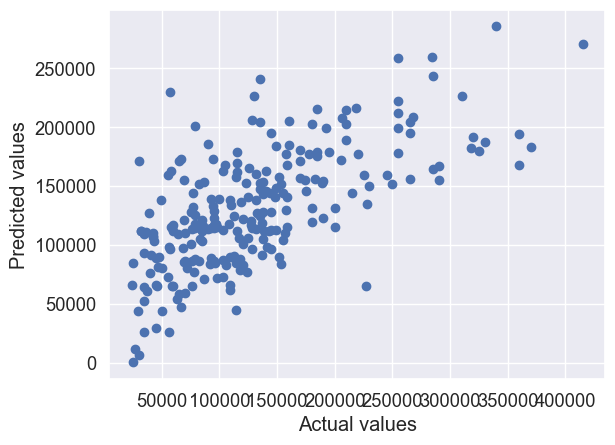

In [39]:
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error,r2_score

def NNRegressor(data):
    X = pd.DataFrame(data.drop(['price'],axis=1))
    y = pd.DataFrame(data['price'])
    # print(X.head)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 1)
    mlp = MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500)
    mlp.fit(X_train, y_train)
    
    y_pred = mlp.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print("MSE:", mse)
    print("R2 score:", r2)
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()
    return [y_test,y_pred]
y_test=NNRegressor(normalized_data)[0]
y_pred=NNRegressor(normalized_data)[1]


In [40]:
residuals = y_test - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residuals Plot")
plt.show()

ValueError: Unable to coerce to Series, length must be 1: given 239

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

def evaluate_model(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the RandomForestRegressor class
    rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(rf_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model(normalized_data))

(0.29941968274864167, 0.07335604633878406)


In [49]:
import sys
!{sys.executable} -m pip install xgboost
import xgboost as xgb

def evaluate_model_xgb(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the XGBRegressor class
    xgb_regressor = xgb.XGBRegressor(n_estimators=100, random_state=42)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(xgb_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model_xgb(normalized_data))

     ---------------------------------------- 70.9/70.9 MB 1.9 MB/s eta 0:00:00


(0.16674927375041937, 0.10135303311384833)


In [50]:
import lightgbm as lgb

def evaluate_model_lgb(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the LGBMRegressor class
    lgb_regressor = lgb.LGBMRegressor(n_estimators=100, random_state=42)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(lgb_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model_lgb(normalized_data))

ModuleNotFoundError: No module named 'lightgbm'

In [ ]:
import catboost as cb

def evaluate_model_cb(normalized_data):
    # Split the data into independent variables X and dependent variable y
    X = normalized_data.drop('price', axis=1)
    y = normalized_data['price']

    # Create an instance of the CatBoostRegressor class
    cb_regressor = cb.CatBoostRegressor(n_estimators=100, random_state=42, silent=True)

    # Evaluate the performance of the model using cross-validation
    scores = cross_val_score(cb_regressor, X, y, cv=5, scoring='r2')

    # Calculate the mean and standard deviation of the scores
    mean_score = scores.mean()
    std_score = scores.std()

    return mean_score, std_score
print(evaluate_model_cb(normalized_data))

In [51]:
def fit_glm(data):
    # Split the data into independent variables X and dependent variable y
    X = data.drop('price', axis=1)
    y = data['price']

    # Add a constant term to the independent variables
    X = sm.add_constant(X)

    # Create an instance of the GLM class
    glm_model = sm.GLM(y, X, family=sm.families.Gaussian())

    # Fit the model to the data
    glm_results = glm_model.fit()

    return glm_results.summary()
fit_glm(normalized_data)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  price   No. Observations:                 2384
Model:                            GLM   Df Residuals:                     2360
Model Family:                Gaussian   Df Model:                           23
Link Function:               identity   Scale:                      3.8558e+09
Method:                          IRLS   Log-Likelihood:                -29682.
Date:                Mon, 03 Apr 2023   Deviance:                   9.0997e+12
Time:                        10:05:36   Pearson chi2:                 9.10e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.5134
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         1.035e+05   7246.629     14.276      0.000    8.92e+04    1.18e+05
Année-Modèle                  8561.5324   1688.401      5.071      0.000    5252.327    1.19e+04
Kilométrage                  -5854.8892   1443.423     -4.056      0.000   -8683.946   -3025.832
puissance                     6460.6770    791.607      8.161      0.000    4909.155    8012.199
Modèle_mean_target              2.4e+04   1751.476     13.703      0.000    2.06e+04    2.74e+04
Ville_mean_target              1.14e+04   1332.225      8.556      0.000    8787.016     1.4e+04
Première main_Non               62.1640   3683.438      0.017      0.987   -7157.242    7281.570
Première main_Oui             1941.5790   3884.601      0.500      0.617   -5672.100    9555.258
boite_Automatique             4.808e+04   3721.418     12.920      0.000    4.08e+04    5.54e+04
boite_Manuelle               -3.368e+04   3187.965    -10.566      0.000   -3.99e+04   -2.74e+04
État_6                       -3673.1176   6804.185     -0.540      0.589    -1.7e+04    9662.840
État_Bon                     -1823.5875   6226.069     -0.293      0.770    -1.4e+04    1.04e+04
État_Correct                  3941.5010   1.48e+04      0.267      0.789    -2.5e+04    3.29e+04
État_Endommagé               -3.331e+04   6.26e+04     -0.532      0.595   -1.56e+05    8.94e+04
État_Excellent               -5586.6897   5224.162     -1.069      0.285   -1.58e+04    4652.479
État_Très bon                 -847.1390   5032.082     -0.168      0.866   -1.07e+04    9015.560
Origine_Dédouanée             1131.7643   5833.318      0.194      0.846   -1.03e+04    1.26e+04
Origine_Importée neuve       -1.104e+04   7040.167     -1.568      0.117   -2.48e+04    2757.198
Origine_Pas encore dédouanée  3793.2125   2.13e+04      0.178      0.859    -3.8e+04    4.56e+04
Origine_WW au Maroc          -7374.9056   4803.604     -1.535      0.125   -1.68e+04    2039.984
carburant_Diesel              2411.5390   3024.259      0.797      0.425   -3515.899    8338.977
carburant_Electrique         -4.853e+04   3.63e+04     -1.337      0.181    -1.2e+05    2.26e+04
carburant_Essence            -4.344e+04   4982.266     -8.719      0.000   -5.32e+04   -3.37e+04
carburant_Hybride             5.984e+04   2.37e+04      2.525      0.012    1.34e+04    1.06e+05
================================================================================================
"""

In [52]:
sns.histplot(data=residuals, kde=True, stat='density', bins=30)
sns.lineplot(x=sorted(residuals), y=norm.pdf(sorted(residuals), loc=residuals.mean(), scale=residuals.std()))

plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.show()

NameError: name 'residuals' is not defined

In [141]:
from scipy.stats import skew, kurtosis
skewness = skew(residuals)
kurt = kurtosis(residuals)

print('Skewness: ', skewness)
print('Kurtosis: ', kurt)

Skewness:  2.2721379823513392
Kurtosis:  9.345612089827917


In [142]:
data_new.head()

,Modèle,État,Année-Modèle,Origine,Kilométrage,Première main,carburant,Ville,boite,price,Modèle_mean_target,Ville_mean_target
0,Tiguan,6,-0.174170,0,0.776607,2,0,Fquih Ben Saleh,2,210000.0,0.444020,0.085127
1,190,5,-1.164002,0,1.755394,0,4,Dakhla,1,55000.0,-1.171229,0.520697
2,Lodgy,5,-0.174170,3,-1.578601,1,0,Ouled Teïma,2,87000.0,1.775269,-2.658758
3,2,4,-0.739789,3,-0.079833,1,4,El Jadida,1,54000.0,-1.366479,-1.059850
4,Kadjar,4,0.391448,3,-0.599814,1,4,Casablanca,1,159000.0,0.426270,0.776946


In [143]:
data_new['Modèle_mean_target']= data_new['Modèle_mean_target'].fillna(data_new['Modèle_mean_target'].mean())

unique_column1 = data_new['Modèle'].unique()
unique_column2 = sorted(data_new['Modèle_mean_target'].unique())

# create a dictionary with unique_column1 values as keys and sorted unique_column2 values as values
dictionary = {key: value for key, value in zip(unique_column1, unique_column2)}

# print the resulting dictionary
# print the resulting dictionary
dictionary

{'Tiguan': -2.1119787540981005,
 '190': -2.00547882579903,
 'Lodgy': -1.9788538437242624,
 '2': -1.9699788496993398,
 'Kadjar': -1.8989788974999595,
 'Dokker': -1.8634789214002694,
 'Fiesta': -1.8457289333504243,
 'Duster': -1.836853939325502,
 'C-Elysée': -1.8279789453005792,
 'Cayenne': -1.7924789692008891,
 'Kuga': -1.756978993101199,
 'Logan': -1.739229005051354,
 'i 10': -1.7214790170015088,
 'A6': -1.7037290289516638,
 '220': -1.6859790409018187,
 'Berlingo': -1.6149790887024384,
 '208': -1.5794791126027483,
 'Focus': -1.5262291484532131,
 'Partner': -1.472979184303678,
 'Swift': -1.4552291962538328,
 'GOLF 7': -1.4374792082039878,
 'Clio': -1.4197292201541427,
 'Kangoo': -1.4019792321042976,
 '207': -1.3842292440544526,
 'a5_sportback': -1.3753542500295302,
 'sandero_stepway': -1.3664792560046075,
 'FREEMONT': -1.3487292679547624,
 'megane_4': -1.3309792799049174,
 'Korando': -1.2866043097803048,
 'Q7': -1.2688543217304598,
 'Megane 3': -1.224479351605847,
 'Actyon': -1.20672936

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import StackingRegressor
import pandas as pd
import numpy as np

# Load data into a pandas dataframe

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_data.drop('price', axis=1), normalized_data['price'], test_size=0.2, random_state=42)

# Define the base models
base_models = [('rf', RandomForestRegressor(n_estimators=1000, random_state=42)),
               ('gb', GradientBoostingRegressor(random_state=42)),
               ('lasso', Lasso(alpha=0.5)),
               ('ridge', Ridge(alpha=0.5))]

# Define the stacking model
stack_model = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(n_estimators=100, random_state=42))

# Fit the stacking model on training data
stack_model.fit(X_train, y_train)

# Predict on test data
y_pred = stack_model.predict(X_test)

# Calculate mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error: ", mse)
print("R-squared score: ", r2)

Mean Squared Error:  4456066982.24709
R-squared score:  0.355021539111118


In [57]:
!{sys.executable} -m pip install tensorflow
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load data into a pandas dataframe

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_data.drop('price', axis=1), normalized_data['price'], test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the deep learning model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on test data
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error: ", mse)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached jax-0.4.8.tar.gz (1.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached termcolor-2.2.0-py3-none-any.whl (6.6 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-4.22.1-cp310-abi3-win_amd64.whl (420 kB)
  Using cached tensorflow_io_gcs_filesystem-0.31.0-cp310-cp310-win_amd64.whl (1.5 MB)
  Using cached libclang-16.0.0-py2.p

48/48 [==============================] - 0s 7ms/step - loss: 25649580032.0000 - val_loss: 25596813312.0000
Epoch 7/100
48/48 [==============================] - 0s 7ms/step - loss: 25625425920.0000 - val_loss: 25567301632.0000
Epoch 8/100
48/48 [==============================] - 0s 7ms/step - loss: 25591902208.0000 - val_loss: 25527179264.0000
Epoch 9/100
48/48 [==============================] - 0s 7ms/step - loss: 25545707520.0000 - val_loss: 25474570240.0000
Epoch 10/100
48/48 [==============================] - 0s 7ms/step - loss: 25486884864.0000 - val_loss: 25407719424.0000
Epoch 11/100
48/48 [==============================] - 0s 7ms/step - loss: 25412440064.0000 - val_loss: 25326061568.0000
Epoch 12/100
48/48 [==============================] - 0s 7ms/step - loss: 25325240320.0000 - val_loss: 25228091392.0000
Epoch 13/100
48/48 [==============================] - 0s 7ms/step - loss: 25222959104.0000 - val_loss: 25112111104.0000
Epoch 14/100
48/48 [==============================] - 0s

Epoch 75/100
48/48 [==============================] - 0s 6ms/step - loss: 7057205760.0000 - val_loss: 6698051584.0000
Epoch 76/100
48/48 [==============================] - 0s 7ms/step - loss: 6929170944.0000 - val_loss: 6624815104.0000
Epoch 77/100
48/48 [==============================] - 0s 7ms/step - loss: 7016858624.0000 - val_loss: 6555021312.0000
Epoch 78/100
48/48 [==============================] - 0s 7ms/step - loss: 6847340032.0000 - val_loss: 6487364608.0000
Epoch 79/100
48/48 [==============================] - 0s 7ms/step - loss: 6958985728.0000 - val_loss: 6423632384.0000
Epoch 80/100
48/48 [==============================] - 0s 7ms/step - loss: 6714942464.0000 - val_loss: 6359942144.0000
Epoch 81/100
48/48 [==============================] - 0s 7ms/step - loss: 6441380864.0000 - val_loss: 6300627456.0000
Epoch 82/100
48/48 [==============================] - 0s 7ms/step - loss: 6597692928.0000 - val_loss: 6241070592.0000
Epoch 83/100
48/48 [==============================] - 0s

In [69]:
import statsmodels.api as sm
normalized_data['Kilométrage_Modèle_mean_target'] = normalized_data['Kilométrage'] * normalized_data['Modèle_mean_target']
normalized_data['Kilométrage_Ville_mean_target'] = normalized_data['Kilométrage'] * normalized_data['Ville_mean_target']

# Fit linear regression model with interaction terms
X = normalized_data.drop('price',axis=1)
y = normalized_data['price']
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

# Print summary of regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     68.63
Date:                Mon, 03 Apr 2023   Prob (F-statistic):          8.52e-258
Time:                        10:53:19   Log-Likelihood:                -29681.
No. Observations:                2384   AIC:                         5.941e+04
Df Residuals:                    2358   BIC:                         5.956e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                           1.033e+05   7260.378     14.223      0.000     8.9e+04    1.17e+05
Année-Modèle                    8573.2890   1691.068      5.070      0.000    5257.154    1.19e+04
Kilométrage                    -6091.8711   1527.949     -3.987      0.000   -9088.134   -3095.608
puissance                       6461.0532    792.004      8.158      0.000    4907.957    8014.150
Modèle_mean_target              2.402e+04   1752.596     13.705      0.000    2.06e+04    2.75e+04
Ville_mean_target                1.14e+04   1342.384      8.490      0.000    8764.430     1.4e+04
Première main_Non                153.5683   3696.297      0.042      0.967   -7094.761    7401.897
Première main_Oui               1928.5896   3886.789      0.496      0.620   -5693.290    9550.469
boite_Automatique               4.815e+04   3725.302     12.924      0.000    4.08e+04    5.55e+04
boite_Manuelle                 -3.361e+04   3193.947    -10.522      0.000   -3.99e+04   -2.73e+04
État_6                         -3933.4252   6827.481     -0.576      0.565   -1.73e+04    9455.064
État_Bon                       -1876.0094   6234.262     -0.301      0.764   -1.41e+04    1.03e+04
État_Correct                    3942.4690   1.48e+04      0.267      0.790    -2.5e+04    3.29e+04
État_Endommagé                 -3.334e+04   6.26e+04     -0.532      0.595   -1.56e+05    8.95e+04
État_Excellent                 -5701.3225   5232.521     -1.090      0.276    -1.6e+04    4559.497
État_Très bon                   -945.8829   5041.405     -0.188      0.851   -1.08e+04    8940.164
Origine_Dédouanée               1356.0817   5856.104      0.232      0.817   -1.01e+04    1.28e+04
Origine_Importée neuve         -1.091e+04   7049.918     -1.547      0.122   -2.47e+04    2916.604
Origine_Pas encore dédouanée    4176.0014   2.14e+04      0.196      0.845   -3.77e+04    4.61e+04
Origine_WW au Maroc            -7248.4780   4812.518     -1.506      0.132   -1.67e+04    2188.728
carburant_Diesel                2495.5581   3030.279      0.824      0.410   -3446.729    8437.846
carburant_Electrique           -4.989e+04   3.64e+04     -1.370      0.171   -1.21e+05    2.15e+04
carburant_Essence              -4.345e+04   4984.191     -8.717      0.000   -5.32e+04   -3.37e+04
carburant_Hybride               5.991e+04   2.37e+04      2.527      0.012    1.34e+04    1.06e+05
Kilométrage_Modèle_mean_target  -778.4834   1593.265     -0.489      0.625   -3902.829    2345.862
Kilométrage_Ville_mean_target      9.2497   1161.331      0.008      0.994   -2268.086    2286.585
==============================================================================
Omnibus:                      357.970   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (J

In [59]:
normalized_data.head()

,Année-Modèle,Kilométrage,puissance,price,Modèle_mean_target,Ville_mean_target,Première main_Non,Première main_Oui,boite_Automatique,boite_Manuelle,...,Origine_Dédouanée,Origine_Importée neuve,Origine_Pas encore dédouanée,Origine_WW au Maroc,carburant_Diesel,carburant_Electrique,carburant_Essence,carburant_Hybride,Kilométrage_Modèle_mean_target,Kilométrage_Ville_mean_target
0,-0.174170,0.776607,8,210000.0,0.444020,0.085127,0,0,0,0,...,1,0,0,0,1,0,0,0,0.344828,0.066110
1,-1.164002,1.755394,8,55000.0,-1.171229,0.520697,1,0,0,1,...,1,0,0,0,0,0,0,0,-2.055969,0.914028
2,-0.174170,-1.578601,6,87000.0,1.775269,-2.658758,0,1,0,0,...,0,0,0,1,1,0,0,0,-2.802441,4.197119
3,-0.739789,-0.079833,8,54000.0,-1.366479,-1.059850,0,1,0,1,...,0,0,0,1,0,0,0,0,0.109090,0.084611
4,0.391448,-0.599814,6,159000.0,0.426270,0.776946,0,1,0,1,...,0,0,0,1,0,0,0,0,-0.255682,-0.466023


Maintenant, on voudrait tester l'hypothese $H_{0}: \beta_{i,j}=0$ vs $H_{1}: \beta_{i,j} \neq 0$

In [75]:
output = [results.params, results.bse, results.tvalues, results.pvalues, results.conf_int()]
output = pd.concat(output, axis=1).round(3)
output.columns = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output.insert(0, 'Parameter', ['const', 'Année-Modèle', 'Kilométrage', 'puissance', 
       'Modèle_mean_target', 'Ville_mean_target', 'Première main_Non',
       'Première main_Oui', 'boite_Automatique', 'boite_Manuelle', 'État_6',
       'État_Bon', 'État_Correct', 'État_Endommagé', 'État_Excellent',
       'État_Très bon', 'Origine_Dédouanée', 'Origine_Importée neuve',
       'Origine_Pas encore dédouanée', 'Origine_WW au Maroc',
       'carburant_Diesel', 'carburant_Electrique', 'carburant_Essence',
       'carburant_Hybride', 'Kilométrage_Modèle_mean_target',
       'Kilométrage_Ville_mean_target'])

output

,Parameter,Value,Standard Error,t-Statistic,p-Value,Lower CI,Upper CI
const,const,103262.000,7260.378,14.223,0.000,89024.613,117499.388
Année-Modèle,Année-Modèle,8573.289,1691.068,5.070,0.000,5257.154,11889.424
Kilométrage,Kilométrage,-6091.871,1527.949,-3.987,0.000,-9088.134,-3095.608
puissance,puissance,6461.053,792.004,8.158,0.000,4907.957,8014.150
Modèle_mean_target,Modèle_mean_target,24019.245,1752.596,13.705,0.000,20582.455,27456.034
Ville_mean_target,Ville_mean_target,11396.805,1342.384,8.490,0.000,8764.430,14029.179
Première main_Non,Première main_Non,153.568,3696.297,0.042,0.967,-7094.761,7401.897
Première main_Oui,Première main_Oui,1928.590,3886.789,0.496,0.620,-5693.290,9550.469
boite_Automatique,boite_Automatique,48146.931,3725.302,12.924,0.000,40841.724,55452.139
boite_Manuelle,boite_Manuelle,-33605.380,3193.947,-10.522,0.000,-39868.616,-27342.145


In [74]:
normalized_data.columns

Index(['Année-Modèle', 'Kilométrage', 'puissance', 'price',
       'Modèle_mean_target', 'Ville_mean_target', 'Première main_Non',
       'Première main_Oui', 'boite_Automatique', 'boite_Manuelle', 'État_6',
       'État_Bon', 'État_Correct', 'État_Endommagé', 'État_Excellent',
       'État_Très bon', 'Origine_Dédouanée', 'Origine_Importée neuve',
       'Origine_Pas encore dédouanée', 'Origine_WW au Maroc',
       'carburant_Diesel', 'carburant_Electrique', 'carburant_Essence',
       'carburant_Hybride', 'Kilométrage_Modèle_mean_target',
       'Kilométrage_Ville_mean_target'],
      dtype='object')

In [80]:
normalized_data.drop(['État_6',
       'État_Bon', 'État_Correct', 'État_Endommagé', 'État_Excellent',
       'État_Très bon', 'Origine_Dédouanée', 'Origine_Importée neuve',
       'Origine_Pas encore dédouanée', 'Origine_WW au Maroc',
       'carburant_Diesel', 'carburant_Electrique', 'carburant_Essence',
       'carburant_Hybride', 'Kilométrage_Modèle_mean_target',
       'Kilométrage_Ville_mean_target','Première main_Non',
       'Première main_Oui'],axis=1, inplace=True)

In [81]:
X = normalized_data.drop('price',axis=1)
y = normalized_data['price']

model = sm.OLS(y, X)
results = model.fit()

# Print summary of regression results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.830
Model:                            OLS   Adj. R-squared (uncentered):              0.830
Method:                 Least Squares   F-statistic:                              1658.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):                        0.00
Time:                        11:11:06   Log-Likelihood:                         -29851.
No. Observations:                2384   AIC:                                  5.972e+04
Df Residuals:                    2377   BIC:                                  5.976e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Année-Modèle        9740.7030   1628.329      5.982      0.000    6547.610    1.29e+04
Kilométrage        -5592.5334   1520.818     -3.677      0.000   -8574.800   -2610.267
puissance           1.758e+04    271.388     64.785      0.000     1.7e+04    1.81e+04
Modèle_mean_target  2.384e+04   1854.622     12.854      0.000    2.02e+04    2.75e+04
Ville_mean_target    1.13e+04   1414.459      7.988      0.000    8524.658    1.41e+04
boite_Automatique     5.2e+04   3744.447     13.889      0.000    4.47e+04    5.93e+04
boite_Manuelle     -2.286e+04   2999.029     -7.621      0.000   -2.87e+04    -1.7e+04
==============================================================================
Omnibus:                      161.797   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.797
Skew:                           0.319   Prob(JB):                    2.95e-109
Kurtosis:                       5.151   Cond. No.                         23.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
output = [results.params, results.bse, results.tvalues, results.pvalues, results.conf_int()]
output = pd.concat(output, axis=1).round(3)
output.columns = ['Value', 'Standard Error', 't-Statistic', 'p-Value', 'Lower CI', 'Upper CI']
output.insert(0, 'Parameter', ['const', 'Année-Modèle', 'Kilométrage', 'puissance', 
       'Modèle_mean_target', 'Ville_mean_target', 'boite_Manuelle'])

output

,Parameter,Value,Standard Error,t-Statistic,p-Value,Lower CI,Upper CI
Année-Modèle,const,9740.703,1628.329,5.982,0.0,6547.610,12933.796
Kilométrage,Année-Modèle,-5592.533,1520.818,-3.677,0.0,-8574.800,-2610.267
puissance,Kilométrage,17581.982,271.388,64.785,0.0,17049.800,18114.163
Modèle_mean_target,puissance,23839.449,1854.622,12.854,0.0,20202.606,27476.293
Ville_mean_target,Modèle_mean_target,11298.359,1414.459,7.988,0.0,8524.658,14072.059
boite_Automatique,Ville_mean_target,52004.961,3744.447,13.889,0.0,44662.240,59347.682
boite_Manuelle,boite_Manuelle,-22855.725,2999.029,-7.621,0.0,-28736.708,-16974.742
